Which object do you want to use to generate data ?

>> Poivre


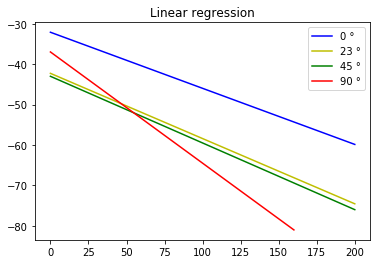

Choose a distance >> 5
Correct distance
Choose a distance >> 15
Correct distance
Choose a distance >> 25
Correct distance
Choose a distance >> 40
Correct distance
Choose a distance >> 60
Correct distance
Choose a distance >> 80
Correct distance
Choose a distance >> 100
Correct distance
Choose a distance >> 120
Correct distance
Choose a distance >> 140
Correct distance
Choose a distance >> 160
Correct distance
Choose a distance >> 180
Correct distance
Choose a distance >> 200
Correct distance
Choose a distance >> done
Choosen distances : 
5
15
25
40
60
80
100
120
140
160
180
200
--------0°--------
5 cm
XP : -31.73
Theory : -50.850958571268734
Delta : 19.120958571268734
15 cm
XP : -31.175
Theory : -70.91886980345363
Delta : 39.743869803453634
25 cm
XP : -35.305
Theory : -80.24991714253747
Delta : 44.94491714253747
40 cm
XP : -35.205
Theory : -88.83528543651762
Delta : 53.630285436517624
60 cm
XP : -41.8
Theory : -96.24175438028622
Delta : 54.44175438028623
80 cm
XP : -47.79
Theory : -101

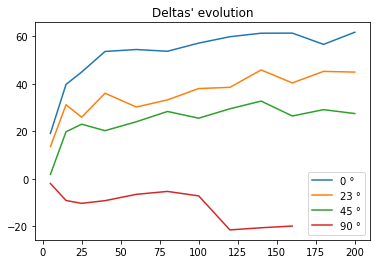

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np

import datetime
import pandas_datareader as pdr
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

import glob, os
import time
import sys
import inspect
import fileinput
import scipy
from scipy import stats
import math

from progressbar import AnimatedMarker, Bar, BouncingBar, Counter, ETA, \
    AdaptiveETA, FileTransferSpeed, FormatLabel, Percentage, \
    ProgressBar, ReverseBar, RotatingMarker, \
SimpleProgress, Timer

#fonction qui renvoie le bon path
def getPath() :
    
    #Renvoie le path courant aussi
    #print(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe()))))

    #Path courant
    cwd = os.getcwd()
    #C:\Users\laure\WebSocketClientCSharp\WebSocketClient\generate

    #On va changer de path (cwd, '../WebSocketClient/bin/Debug/xp/'))
    os.chdir('../xp/')
    
    #print("Path changed. New path is : "+ os.getcwd())

    return;

def verifyFiles() :
    
    ok = False
    print("Which object do you want to use to generate data ?\n")
    
    while(ok is False):
        
        answer = input(">> ")
        
        if answer == '__pycache__':
            print("Do not try to fool me !")
        
        if answer == 'exit':
            sys.exit("The program will shut down now.")
        
        #Si la réponse est un dossier qui existe
        if os.path.isdir(answer):
            #On compte le nombre de fichier à l'intérieur (non récursif)
            numfiles = len([f for f in os.listdir(answer) if os.path.isfile(os.path.join(answer, f)) and f[0] != '.'])        
        
            #Le nombre total de fichiers csv
            if numfiles != 52:
                print("Not enough data ! Make sure you collected all the necessary data before you execute this script")
                print("Please, enter the name of the directory again")

            #Si le dossier existe ET qu'il y a assez de fichiers pour générer les données alors c'est bon
            else:
                ok = True
                
        #Si le dossier n'existe pas alors cela veut dire que l'on ne possède pas assez de données
        else:
            print("The data's object doesn't exist. Make sure you collected all the necessary data before you execute this script")
            print("Please, enter the name of the directory again")
    
    os.chdir(answer)
    return;

def chooseDistances(customDistances,realDistances):
    
    ok = False
    
    while ok is False :
        
        answer = input("Choose a distance >> ")
        
        if answer == 'exit':
            sys.exit("The program will shut down now.")
        if answer == 'done':
            if len(customDistances) > 1:
                ok = True
            else:
                print("To generate the evolution of the deltas you must choose different distances (at least 2)")
        
        for i in realDistances :
            if answer == i:
                customDistances.append(answer)
                print("Correct distance")
    
    print("Choosen distances : ")
    for p in customDistances:
        print(p)
        
    return;

def deleteDeltaCSV() :
    #On va remplir le fichier final : tester s'il existe
    #Si le fichier n'existe pas on le crée
    
    if os.path.isfile('data/deltas/deltas.csv') is True:
        os.remove('data/deltas/deltas.csv')
    
    #On le créer
    open('data/deltas/deltas.csv', 'a').close()        
        
    #On écrit le nom des colonnes
    with open('data/deltas/deltas.csv', 'a') as the_file:
        the_file.write('Distance_Angle;XP;Theory;Delta')
        the_file.write('\n')
    #else:
        
    return;

def testFullFunction(functions) :
    
    #On va delete le précédent deltas.csv ou le créer
    deleteDeltaCSV()
    
    customDistances = []
    realDistances = ['5','15','25','40','60','80','100','120','140','160','180','200']
    
    chooseDistances(customDistances,realDistances)
    
    df = pd.read_csv('data/finalData.csv',sep=';',index_col=0)
    
    for angle in functions:
        
        print("--------" + angle + "°--------")
        
        #On a l'angle courant avec son dictionnaire de données
        #Ex : 0° (angle) --> [slope->slope;intercept->intercept...]
        
        #Nous allons plot les deltas :
        #array pour les X
        distancesPlot = []
        #array pour les Y
        deltas = []

        for currentDistance in customDistances:
            #RSSI enregistré en réel
            
            print(currentDistance + ' cm')
            
            xp = df[angle].get(float(currentDistance))
            
            if str(xp) != 'nan':
                print("XP : " + str(xp))
            
                #RSSI obtenu par le calcul
            
                #on converti l'angle en Radian
                a = math.radians(float(angle))
            
                lnx = math.log(float(currentDistance))

                regression = (1+(math.cos(a)))

                theo = (-9.1333* lnx - 10.726) * regression
                print("Theory : " + str(theo))
            
                delta = xp - theo
                print("Delta : " + str(delta))
                
                #Cela veut dire qu'on a capté on va enregistrer le delta à la distance courante
                distancesPlot.append(int(currentDistance))
                deltas.append(np.asscalar(delta))
                
                with open('data/deltas/deltas.csv', 'a') as the_file:
                    the_file.write(currentDistance+'_'+angle+';'+str(xp)+';'+str(theo)+';'+str(delta))
                    the_file.write('\n')
            
            else:
                print('Antenna not receiving data at '+ currentDistance + ' cm at ' + angle + ' °' )
        
        plt.plot(distancesPlot, deltas,label=angle+' °')
        
        distancesPlot = []
        deltas = []
        
    plt.title('Deltas\' variation')
    plt.legend()
    plt.savefig('data/deltas/deltas.png')
    plt.show()
    
    
    return;

#def testFirstPartFunction(functions) :
    
    
#    return;

def generateRegress(functions) :
    
    #Separé par des ; donc l'index est la première colonne
    df = pd.read_csv('data/finalData.csv',sep=';',index_col=0)

    angles = ['0','23','45','90']
    numpyAngles = np.array(['0','23','45','90'])

    distances = [0,5,15,25,40,60,80,100,120,140,160,180,200]
    numpyDistances = np.array([0,5,15,25,40,60,80,100,120,140,160,180,200])

    y = np.array([])

    colors = ['b','y','g','r']
    i = 0

    #Pour tous les angles (ie. pour toutes les courbes) on va faire une régression linéaire
    for a in angles:
        
        index = 0
        tabDelete = []
        #On va faire un tableau de toutes les valeurs RSSI
        for d in distances :
            
            #On récupère le RSSI pour le couple angle/distance
            temp = df[a].get(d)
    
            #Sinon cela veut dire que pour la distance / angle on a pas de données donc on ignore le temp et on supprime le X correspondant
            if str(temp) == 'nan':
                tabDelete.append(index)
            else:
                #On le push dans le numpy array
                y = np.append(y,[temp])
                
            index = index + 1
            
        numpyDistances = np.delete(numpyDistances,tabDelete)
            
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(numpyDistances,y)
        
        values = {"slope" : slope,
                  "intercept" : intercept,
                  "r_value" : r_value,
                  "p_value" : p_value,
                  "std_err" : std_err}
        functions[a] = values
        
        plt.plot(numpyDistances, intercept + slope*numpyDistances, colors[i], label=a+' °')
        i = i+1
        
        #On vide le tableau des Y : dans Y on a un tableau vide
        y = np.array([])
        numpyDistances = np.array([0,5,15,25,40,60,80,100,120,140,160,180,200])
        
    #On fait la meme chose pour tous les angles qui suivent...
    
    #On affiche les plots
    plt.title('Linear regression')
    plt.legend()
    plt.show()
    
    return;

os.chdir('C:/Users/laure/WebSocketClientCSharp/WebSocketClient/WebSocketClient/bin/Debug/generate')

functions = {}

getPath()

verifyFiles()

generateRegress(functions)

testFullFunction(functions)

#testFirstPartFunction(functions)

os.chdir('../')